<a href="https://colab.research.google.com/github/BrianMoringa/Core-week-9-IP-Submission/blob/main/Notebook1_Core_module_II_Week_9_Brian_Onchweri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  KNN Implementation - 

In [14]:
#Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> On this week's IP We're going to look at the KNN classifier in greater detail. The Dataset given appears to be the Titanic Dataset and abvoiusly that leaves us with the question of how we are going to use KNN in this case. For the purposes of our study we are going to determine based on categorical features present if somehow the survival rate could have been determined by any of this categorical features.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design
1.The First step will be to read our data and visualize columns(features)

2.Clean Our data(Check for missing values and duplicates etc

3.Do Exploratory Data analysis to determine relationships between features

### e) Data Relevance
The Data given was relevant for this study no doubt about that.

## 2. Reading the Data

In [15]:
# Loading the Data from csv Files
df=pd.read_csv('/content/train (5).csv')




## 3. Checking the Data

In [16]:
# Determining the no. of records in our dataset
#
len(df)

891

In [17]:
#Checking the No. of columns we have
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Previewing the bottom of our dataset
#
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

The Dataset given matches our typical Titanic Datatset on Kaggle.For our Study we typically need such a Dataset with relevant column names to predict Survival Rate of passengers if Lets say they were in a Ship and it sank and we needed to prove if indeed particular passengers in a certain class for instance had a high likelihood of survival compared to others. Check out this link as it validates our data [Link](https://www.kaggle.com/competitions/titanic/data).

### a.Validation

## 5. Tidying the Dataset

In [21]:
# Checking for Outliers
#

In [22]:
# Identifying the Missing Data
#
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#As you can see from above we have missing data on age column and cabin 

In [23]:
# Dealing with the Missing Data
#
df['Embarked'].fillna('S',inplace=True)

In [24]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

In [32]:
#Splitting our data into Train and Test with 80:20 Rule 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

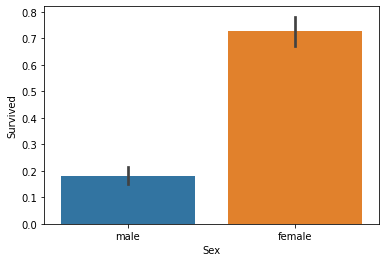

In [28]:
# Ploting the bivariate summaries and recording our observations
#
sns.barplot(data=df_train, x='Sex',y='Survived')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


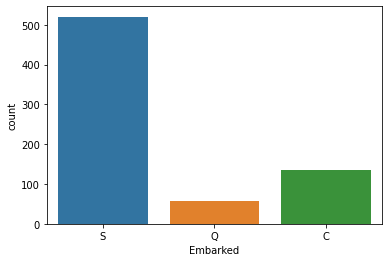

In [29]:
sns.countplot(df_train['Embarked'])

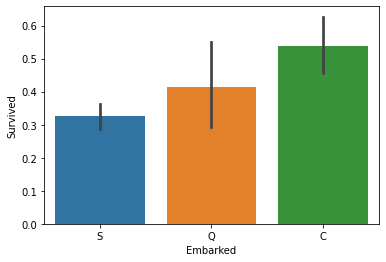

In [30]:
sns.barplot(data=df_train, x='Embarked',y='Survived')
plt.show()


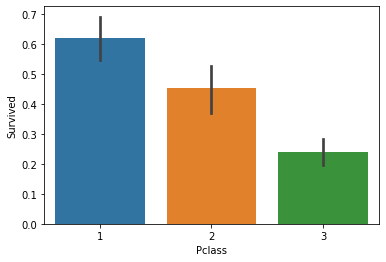

In [31]:
sns.barplot(data=df_train, x='Pclass',y='Survived')
plt.show()

#As we can see above more females survived than men confirming the popular notion that indeed women were given priority on the boats than men 

**From the above plots we hav some sought of idea on the feature to choose for our study**

## 7. Implementing the Solution

In [26]:
#Splitting our data into Train and Test with 80:20 Rule 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.05,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.50,NaN,S
741,742,0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C46,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.05,NaN,S


In [33]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S


In [ ]:
corr_matrix=df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

#**Lets drop columns we dont need**

In [34]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
drpped= ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_new=df_train.drop(drpped, axis=1)
df_train_new.head()


,Survived,Pclass,Sex,Fare,Embarked
889,1,1,male,30.0000,C
725,0,3,male,8.6625,S
525,0,3,male,7.7500,Q
709,1,3,male,15.2458,C
77,0,3,male,8.0500,S


In [36]:
drppeds= ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_test_new=df_test.drop(drppeds, axis=1)
df_test_new.head()

,Survived,Pclass,Sex,Fare,Embarked
467,0,1,male,26.5500,S
546,1,2,female,26.0000,S
202,0,3,male,6.4958,S
611,0,3,male,7.0500,S
168,0,1,male,25.9250,S


In [37]:
mean =  df_test_new['Fare'].mean()
df_test_new['Fare']=df_test_new['Fare'].fillna(mean)
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 467 to 698
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Fare      179 non-null    float64
 4   Embarked  179 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.4+ KB


##**Translating non numerical features to numerical features**

In [38]:
from sklearn.preprocessing import LabelEncoder
Labelencoder=LabelEncoder() 

df_train_new.iloc[:,2]=Labelencoder.fit_transform(df_train_new.iloc[:,2].values)
df_train_new.iloc[:,4]=Labelencoder.fit_transform(df_train_new.iloc[:,4].values)

df_test_new.iloc[:,2]=Labelencoder.fit_transform(df_test_new.iloc[:,2].values)
df_test_new.iloc[:,4]=Labelencoder.fit_transform(df_test_new.iloc[:,4].values)

In [39]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 889 to 830
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.4 KB


###**Splitting the Train data**

In [40]:
X =df_train_new.iloc[:,1:5].values
Y =df_train_new.iloc[:,0].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=4)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(427, 4)
(285, 4)
(427,)
(285,)


#**K_nearest neighbours(KNN) model**

In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [44]:
k_range =range(1,26)
scores = []
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)


[0.7543859649122807, 0.7263157894736842, 0.7684210526315789, 0.7473684210526316, 0.7894736842105263, 0.7789473684210526, 0.7578947368421053, 0.775438596491228, 0.7719298245614035, 0.7824561403508772, 0.7684210526315789, 0.7649122807017544, 0.7614035087719299, 0.7473684210526316, 0.7473684210526316, 0.7403508771929824, 0.7333333333333333, 0.7052631578947368, 0.7192982456140351, 0.6877192982456141, 0.7017543859649122, 0.6736842105263158, 0.6736842105263158, 0.6736842105263158, 0.6736842105263158]


Text(0, 0.5, 'Testing Accuracy')

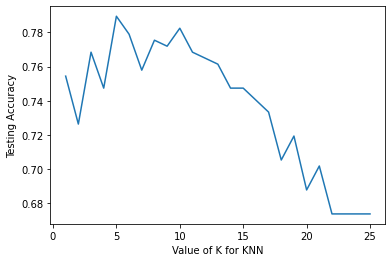

In [45]:
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7684210526315789


###**We get an accuracy of 76%**

## 8. Challenging the solution

> We will challenge the solution above by picking differnt combinations of training and Test data.This is to eliminate the possibility of undertraing or overtraining our model to see if we get different results.






In [47]:
# Challenging  the Solution 
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=4)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(498, 4)
(214, 4)
(498,)
(214,)


###**KNN after altering length of training**

In [49]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k_range =range(1,26)
scores = []
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.7523364485981309, 0.794392523364486, 0.7990654205607477, 0.7990654205607477, 0.8037383177570093, 0.7990654205607477, 0.7990654205607477, 0.7897196261682243, 0.7897196261682243, 0.7850467289719626, 0.780373831775701, 0.7710280373831776, 0.7616822429906542, 0.7570093457943925, 0.7383177570093458, 0.7336448598130841, 0.719626168224299, 0.7383177570093458, 0.7289719626168224, 0.7242990654205608, 0.7149532710280374, 0.677570093457944, 0.705607476635514, 0.677570093457944, 0.6682242990654206]


Text(0, 0.5, 'Testing Accuracy')

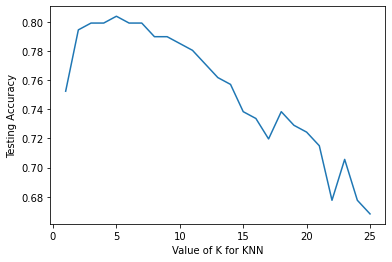

In [51]:
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7990654205607477


###**By Prolonging our lengh of training we've improved our accuracy to almost 80% thats good**

#**Optimizing our model**

##Performing Linear Discriminant analysis to see if we improve our Model

In [54]:
#First we perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

###**Confusion Matrix**

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[131  11]
 [ 28  44]]
Accuracy0.8177570093457944


###**Our Accuracy is now 80% this should be very good**

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

YES Indeed.

### b). Do we need other data to answer our question?
Probably if we want to go deeper.

### c). Did we have the right question?
YES We did